<a href="https://colab.research.google.com/github/swami-gait/Foundations_of_datascience/blob/master/Covid_DataViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url = 'https://api.covid19india.org/states_daily.json'

In [ ]:
import urllib.request

In [ ]:
urllib.request.urlretrieve(url,'data.json');

In [ ]:
covid_data = pd.read_json('data.json')

In [ ]:
covid_data.info

<bound method DataFrame.info of                                           states_daily
0    {'an': '0', 'ap': '1', 'ar': '0', 'as': '0', '...
1    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
2    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
3    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
4    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
..                                                 ...
448  {'an': '61', 'ap': '6924', 'ar': '110', 'as': ...
449  {'an': '0', 'ap': '80', 'ar': '0', 'as': '6', ...
450  {'an': '139', 'ap': '9024', 'ar': '96', 'as': ...
451  {'an': '40', 'ap': '9113', 'ar': '42', 'as': '...
452  {'an': '1', 'ap': '87', 'ar': '0', 'as': '4', ...

[453 rows x 1 columns]>

In [ ]:
import json

In [ ]:
with open('data.json') as f:
    data = json.load(f)
data


{'states_daily': [{'an': '0',
   'ap': '1',
   'ar': '0',
   'as': '0',
   'br': '0',
   'ch': '0',
   'ct': '0',
   'date': '14-Mar-20',
   'dd': '0',
   'dl': '7',
   'dn': '0',
   'ga': '0',
   'gj': '0',
   'hp': '0',
   'hr': '14',
   'jh': '0',
   'jk': '2',
   'ka': '6',
   'kl': '19',
   'la': '0',
   'ld': '0',
   'mh': '14',
   'ml': '0',
   'mn': '0',
   'mp': '0',
   'mz': '0',
   'nl': '0',
   'or': '0',
   'pb': '1',
   'py': '0',
   'rj': '3',
   'sk': '0',
   'status': 'Confirmed',
   'tg': '1',
   'tn': '1',
   'tr': '0',
   'tt': '81',
   'un': '0',
   'up': '12',
   'ut': '0',
   'wb': '0'},
  {'an': '0',
   'ap': '0',
   'ar': '0',
   'as': '0',
   'br': '0',
   'ch': '0',
   'ct': '0',
   'date': '14-Mar-20',
   'dd': '0',
   'dl': '1',
   'dn': '0',
   'ga': '0',
   'gj': '0',
   'hp': '0',
   'hr': '0',
   'jh': '0',
   'jk': '0',
   'ka': '0',
   'kl': '3',
   'la': '0',
   'ld': '0',
   'mh': '0',
   'ml': '0',
   'mn': '0',
   'mp': '0',
   'mz': '0',
   'nl':

In [ ]:
data = data['states_daily']

In [ ]:
covid_data = pd.json_normalize(data)

In [ ]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   an      453 non-null    object
 1   ap      453 non-null    object
 2   ar      453 non-null    object
 3   as      453 non-null    object
 4   br      453 non-null    object
 5   ch      453 non-null    object
 6   ct      453 non-null    object
 7   date    453 non-null    object
 8   dd      453 non-null    object
 9   dl      453 non-null    object
 10  dn      453 non-null    object
 11  ga      453 non-null    object
 12  gj      453 non-null    object
 13  hp      453 non-null    object
 14  hr      453 non-null    object
 15  jh      453 non-null    object
 16  jk      453 non-null    object
 17  ka      453 non-null    object
 18  kl      453 non-null    object
 19  la      453 non-null    object
 20  ld      453 non-null    object
 21  mh      453 non-null    object
 22  ml      453 non-null    ob

In [ ]:
df = covid_data

In [ ]:
df.date = pd.to_datetime(df.date)

In [ ]:
df =df[df.status=='Confirmed']

In [ ]:
df.drop('status',axis=1,inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,1,1,0,81,0,12,0,0
3,0,0,0,0,0,0,0,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,2,0,0,27,0,1,0,0
6,0,0,0,0,0,0,0,2020-03-16,0,0,0,0,0,0,0,0,1,1,3,0,0,6,0,0,0,0,0,1,0,1,0,0,1,0,0,15,0,0,1,0
9,0,0,0,0,0,0,0,2020-03-17,0,1,0,0,0,0,1,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,11,0,2,0,1
12,0,0,0,0,0,0,0,2020-03-18,0,2,0,0,0,0,1,0,1,5,0,8,0,3,0,0,0,0,0,1,1,0,3,0,8,1,0,37,0,2,1,0


In [ ]:
df.set_index('date',inplace=True)

In [ ]:
df.head()

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-14,0,1,0,0,0,0,0,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,1,1,0,81,0,12,0,0
2020-03-15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,2,0,0,27,0,1,0,0
2020-03-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,0,0,6,0,0,0,0,0,1,0,1,0,0,1,0,0,15,0,0,1,0
2020-03-17,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,11,0,2,0,1
2020-03-18,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,1,5,0,8,0,3,0,0,0,0,0,1,1,0,3,0,8,1,0,37,0,2,1,0


In [ ]:
df =df.apply(pd.to_numeric)

In [ ]:
df.tail(25)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-18,4,3963,41,1117,1667,31,243,0,1475,45,180,960,40,750,289,441,4537,593,8,0,8348,15,91,681,2,22,591,350,58,711,19,1284,4807,171,37411,-368,1873,174,2198
2020-07-19,15,5041,90,1018,1412,26,161,0,1211,37,173,965,64,617,167,701,4120,821,19,0,9518,32,20,837,0,10,736,308,109,934,10,1296,4979,223,40235,-163,2211,239,2278
2020-07-20,4,4074,50,1093,1076,20,191,0,954,21,196,998,110,694,225,751,3648,794,17,0,8240,19,14,710,13,33,673,410,93,956,22,1198,4985,202,36806,0,1913,127,2282
2020-07-21,5,4944,68,1680,1109,14,133,0,1349,28,174,1026,33,604,418,608,3649,720,3,0,8336,21,90,785,0,9,647,379,87,983,25,1430,4965,252,39170,0,2128,207,2261
2020-07-22,9,6045,91,972,1502,29,268,0,1227,36,149,1020,61,724,487,453,4764,1038,8,0,10576,24,45,747,20,54,1078,412,121,961,108,1555,5849,126,45601,0,2300,451,2291
2020-07-23,19,7998,42,1047,1625,20,371,0,1041,45,174,1078,109,789,482,718,5030,1078,4,0,9895,20,55,632,9,90,1264,438,120,886,22,1567,6472,206,48443,0,2516,145,2436
2020-07-24,19,8147,65,1130,1820,23,449,0,1025,44,190,1068,120,780,400,353,5007,885,36,0,9615,53,31,736,6,65,1594,477,95,958,17,1640,6785,100,48888,0,2667,272,2216
2020-07-25,31,7813,70,1165,2803,29,363,0,1142,37,146,1081,95,783,277,523,5072,1103,30,0,9251,59,30,716,29,50,1320,468,139,1120,22,1593,6988,105,50072,0,2971,244,2404
2020-07-26,28,7627,32,1142,2605,35,431,0,1075,49,175,1110,127,794,508,615,5199,927,9,0,9431,56,59,874,0,50,1376,534,133,1132,46,0,6986,37,48932,0,3246,143,2341


In [ ]:
df_last_week = df.tail(10)

In [ ]:
df_new=df_last_week[['tn','ka','mh','kl','dl']]

In [ ]:
df_new

,tn,ka,mh,kl,dl
date,,,,,
2020-08-02,5875,5532,9509,1169,961
2020-08-03,5609,4752,8968,961,805
2020-08-04,5063,6259,7760,1083,674
2020-08-05,5175,5619,10309,1195,1076
2020-08-06,5684,6805,11514,1298,1299
2020-08-07,5880,6670,10483,1251,1192
2020-08-08,5883,7178,12822,1420,1404
2020-08-09,5994,5985,12248,1211,1300
2020-08-10,5914,4267,9181,1184,707


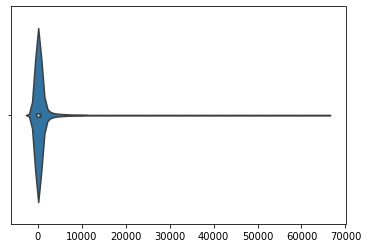

In [ ]:
sns.violinplot(df)

In [ ]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   an      453 non-null    object        
 1   ap      453 non-null    object        
 2   ar      453 non-null    object        
 3   as      453 non-null    object        
 4   br      453 non-null    object        
 5   ch      453 non-null    object        
 6   ct      453 non-null    object        
 7   date    453 non-null    datetime64[ns]
 8   dd      453 non-null    object        
 9   dl      453 non-null    object        
 10  dn      453 non-null    object        
 11  ga      453 non-null    object        
 12  gj      453 non-null    object        
 13  hp      453 non-null    object        
 14  hr      453 non-null    object        
 15  jh      453 non-null    object        
 16  jk      453 non-null    object        
 17  ka      453 non-null    object        
 18  kl      45